In [1]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
bdf = pd.read_csv("./boston.csv")

- CRIM уровень преступности на душу населения по городам
- ZN доля жилой земли, зонированной под участки более 25 000 кв.футов
- INDUS доля нерозничных бизнес-акров на город
- CHAS фиктивная переменная Чарльз-реки (= 1, если участок ограничивается рекой; 0 в противном случае)
- NOX концентрация оксидов азота (частей на 10 миллионов)
- RM среднее количество комнат в доме
- AGE доля занятых владельцами единиц, построенных до 1940 года
- DIS взвешенные расстояния до пяти центров занятости Бостона
- RAD индекс доступности к радиальным шоссе
- TAX ставка налога на имущество по полной стоимости на $10,000
- PTRATIO соотношение учеников и учителей по городам (сколько детей на учителя)
- B 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам
- LSTAT % населения с низким социальным статусом
- MEDV Медианная стоимость занятых владельцами домов в тысячах долларов

In [10]:
bdf

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
bdf.info()

In [ ]:
bdf.isnull().sum()

In [ ]:
bdf.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<Axes: >

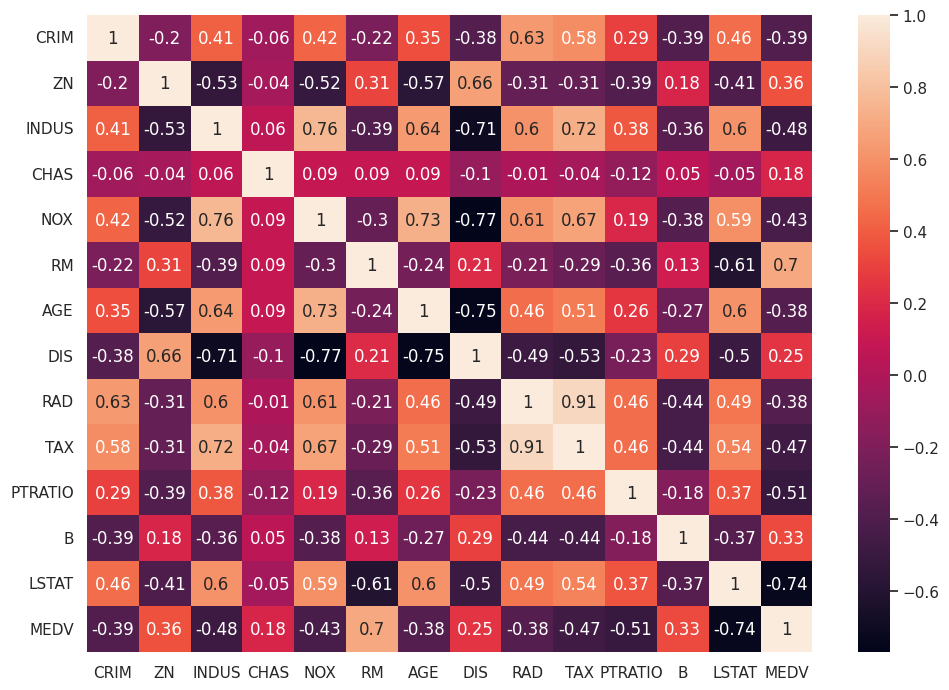

In [ ]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.heatmap(data=bdf.corr().round(2), annot=True)

- **LSTAT** (Процент населения с низким социальным статусом), **RM** (Среднее количество комнат) сильно коррелируют с **MEDV**
- **INDUS** (колличество бизнес земель), **TAX** (налоги), **PTRATIO** (количество учителей), **NOX** (качество воздуха) тоже, но меньше.

In [ ]:
x_lstat = bdf['LSTAT']
x_rm = bdf['RM']
x_indus = bdf['INDUS']
x_tax = bdf['TAX']
x_pt = bdf['PTRATIO']
x_nox = bdf['NOX']
y_medv = bdf['MEDV']

Text(0.5, 1.0, 'Колличество учителей и цены на жилье')

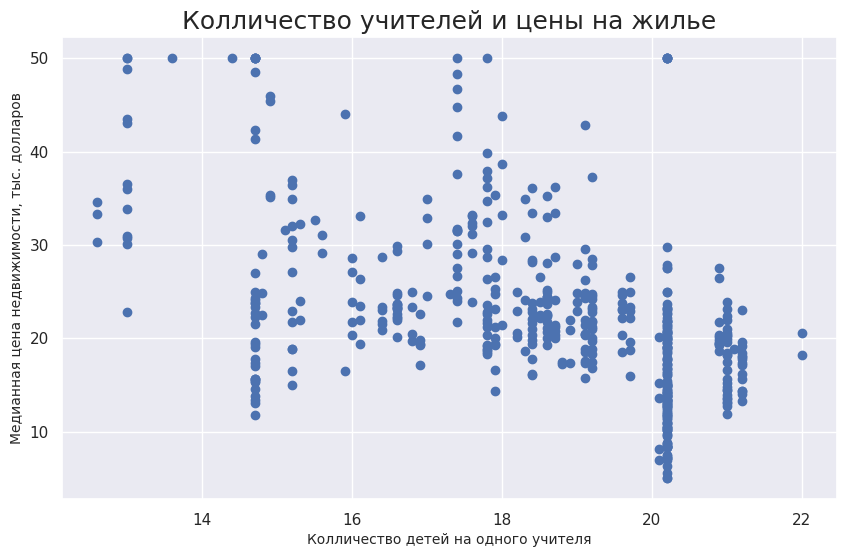

In [ ]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x_pt, y_medv)
 
# добавим подписи
plt.xlabel('Колличество детей на одного учителя', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 10)
plt.title('Колличество учителей и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Загрязненность воздуха и цены на жилье')

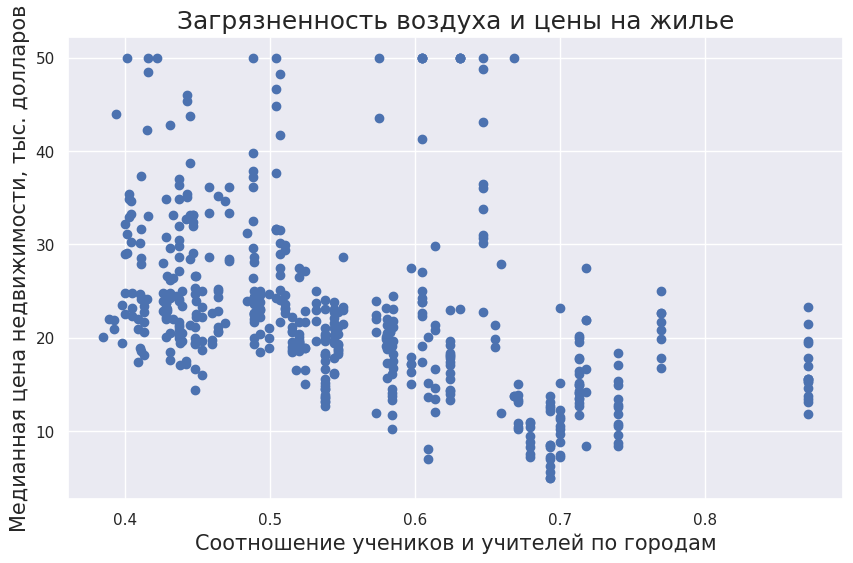

In [ ]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x_nox, y_medv)
 
# добавим подписи
plt.xlabel('Средняя загрязненность воздуха, концентрация оксидов азота (частей на 10 миллионов)', fontsize = 10)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Загрязненность воздуха и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

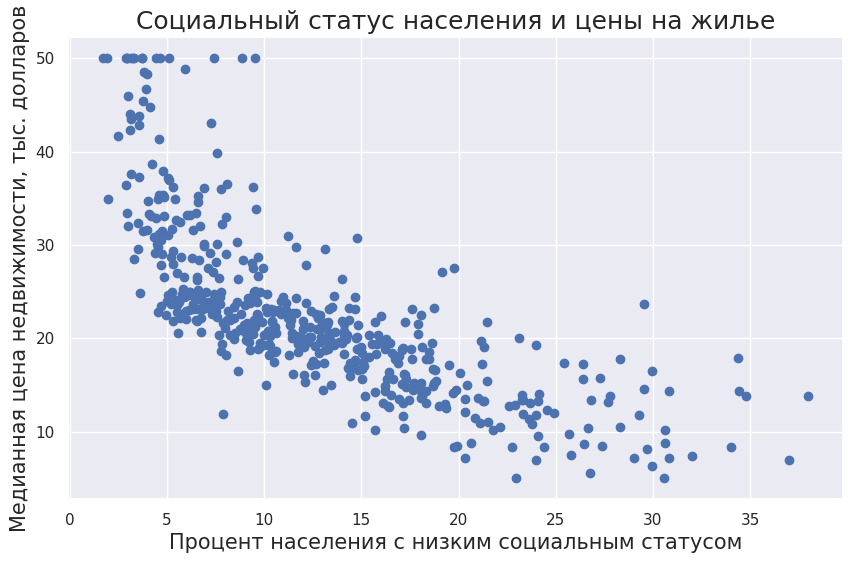

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(x_lstat, y_medv)

plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

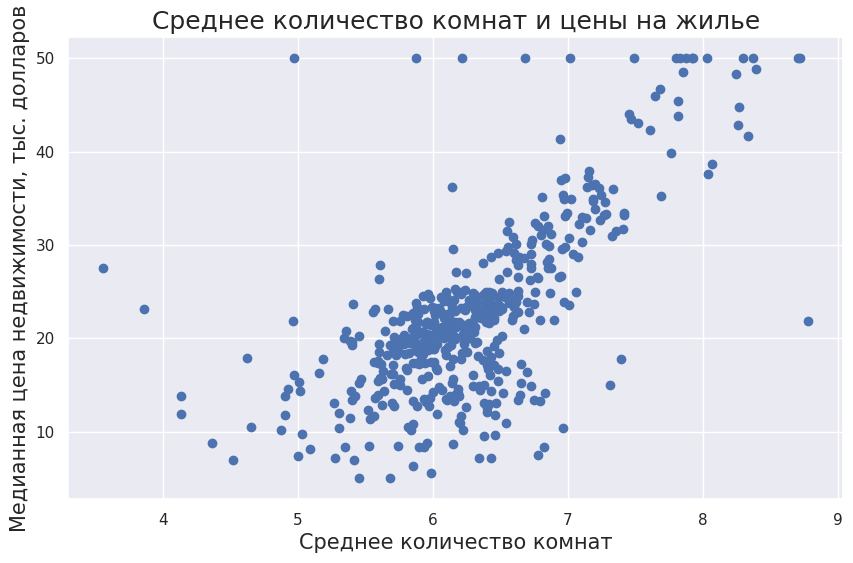

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(x_rm, y_medv)
 
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)